# DSC510_Team_Project: Prediction with conventional/traditional models

In this notebook traditional regression models and approaches were used for the prediction of the price.

Specifically, in this notebook the different categorical features were treated as one-hot variables since the traditional regression models do not handle categorical variables-features by their nature.

In [1]:
import numpy as np
import pandas as pd

random_state = 420
np.random.seed(random_state) 

## Load preprocessed data

data_df = pd.read_csv('finalized_data_df.csv')
display(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7797 entries, 0 to 7796
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Reviews       7797 non-null   float64
 1   Ratings       7797 non-null   int64  
 2   Genre         7797 non-null   object 
 3   BookCategory  7797 non-null   object 
 4   Price         6237 non-null   float64
 5   Set           7797 non-null   object 
 6   Authors       7797 non-null   object 
 7   No. Authors   7797 non-null   int64  
 8   Print         7797 non-null   object 
 9   Type          7797 non-null   object 
 10  Year          7797 non-null   float64
 11  Topic 0       7797 non-null   float64
 12  Topic 1       7797 non-null   float64
 13  Topic 2       7797 non-null   float64
 14  Topic 3       7797 non-null   float64
 15  Topic 4       7797 non-null   float64
 16  Topic 5       7797 non-null   float64
 17  Topic 6       7797 non-null   float64
 18  Topic 7       7797 non-null 

None

## Feature engineering for the categorical variables

Firstly, for all the categorical variables, it was decided to remove the categories which are non-frequently present in the dataset.

Specifically, the threshold $T$ was set to 0.2%, which would only remove a small amount of categories, which will not be significant.

In [2]:
# frq_drop_threshold
T = 0.2 * 1/100

### Multi-valued categories variables

Unlike the ordinal one-hot encoding, for the multi-valued categorical variables (like authors column which had multiple authors included) it was essential to include both of the values which were present.

For example for a book that has multiple authors, $Giannis$ and $Kostis$, the values of the two columns which correspond to the two authors had to be equal to $1$. This case is presented in the artificial example below, for the book with ID $2$:

$$\begin{aligned}
& \text {Encoding example for books with multiple authors}\\
&\begin{array}{cccc}
\hline \hline \text { Book ID} & \text { Author Giannis } & \text { Author George } & \text {Author Kostis } \\
\hline 1 & 1 & 0 & 0 \\
2 & 0 & 1 & 0 \\
3 & 1 & 0 & 1 \\
\hline
\end{array}
\end{aligned}$$

The cateogrical variables which had multiple values included were the <b>Authors</b> and <b>Type</b> variables.

The functions below will be used for the encoding of the multi-valued variables

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

In [19]:
from sklearn.preprocessing import MultiLabelBinarizer


def multi_label_binarize_feature(feature_series):
    df_feature = pd.DataFrame(feature_series, columns=['initial_feature'])
    mlb = MultiLabelBinarizer()
    _X = mlb.fit_transform(df_feature.initial_feature)
    df_one_hot_feature = pd.DataFrame(_X, columns=mlb.classes_)
    return df_one_hot_feature

def handle_features(df_one_hot, other_label, keep_rare=True, frq_drop_threshold=T):
    # Sort values based on their frequencies
    df_values = df_one_hot.astype(bool).sum(axis=0).sort_values(ascending=False)
    
    # Plots the top 70 frequencies of the different categories
    sns.set(rc={'figure.figsize':(15.7,8.27)})
    ax = sns.barplot(x=df_values.index[0:70], y=df_values.values[0:70])
    for p in ax.patches:
       ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01), rotation=90)
    plt.xticks(rotation=90)
    plt.show()
    
    # Mark the columns/categorise which will be dropped based on 
    # the given frequency thershold frq_drop_threshold
    drop_list = []
    for category, value in df_values.items():
        if value < frq_drop_threshold * len(df_one_hot):
            drop_list.append(category)

    # Drop the marked columns/categories and 
    # replace with a new "other" category
    if keep_rare == True:
        df_one_hot[other_label] = 0
    for category in drop_list:
        if keep_rare == True:
            df_one_hot[other_label] = df_one_hot[other_label] + df_one_hot[category]
        df_one_hot = df_one_hot.drop([category], axis=1)
    # Since its a one-hot (yes/no) representation we keep only 
    if keep_rare == True:
        df_one_hot.loc[df_one_hot[other_label] > 0, other_label] = 1
    return df_one_hot

#### Encoding of Type

,ADPCM,Abridged,Audiobook,Bargain Price,Box set,DVD,Deckle Edge,Deluxe Edition,EveryBook,Facsimile,...,Import,International Edition,Kindle eBook,Large Print,NA_kind,NTSC,Print,Special Edition,Student Edition,Unabridged
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Category-kind frequencies: 


NA_kind                  6808
Import                    785
Illustrated                72
Unabridged                 24
Special Edition            22
Box set                    21
Abridged                   20
Audiobook                  18
Student Edition            16
Large Print                15
International Edition      14
Deckle Edge                 8
Facsimile                   4
Print                       4
Kindle eBook                2
NTSC                        1
Bargain Price               1
EveryBook                   1
DVD                         1
Deluxe Edition              1
ADPCM                       1
dtype: int64

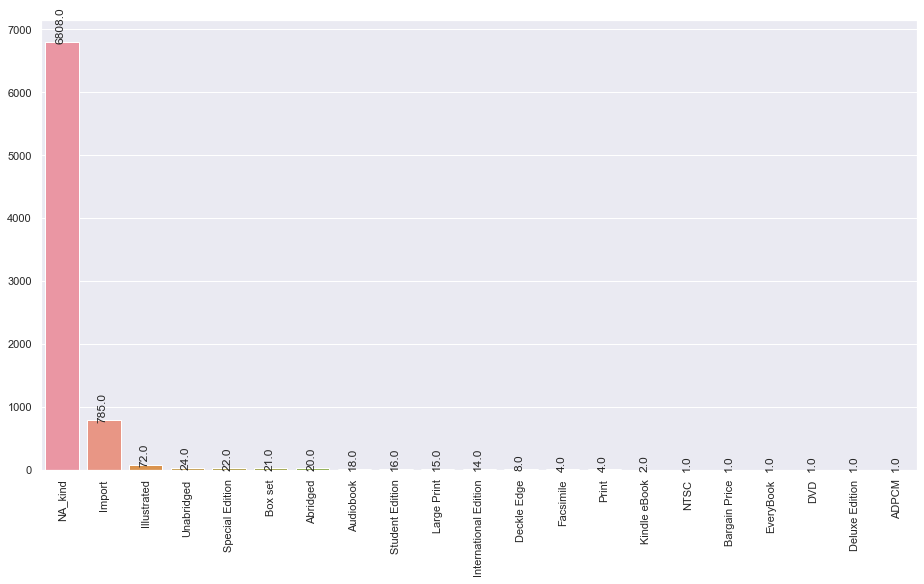

Category-kind frequencies after removing the non-frequent: 


Import             785
Illustrated         72
Rare_Kind           52
Unabridged          24
Special Edition     22
Box set             21
Abridged            20
Audiobook           18
Student Edition     16
dtype: int64

In [5]:
# Taking a series of lists for the different kinds, since books have multiple kinds
kind_series = pd.Series([kind.split(",") for kind in data_df['Type']])
# Encoding with MultiLabelBinarizer, since one-hot only takes one value, but 
# in our case we have multiple kinds for a book
df_kind_one_hot = multi_label_binarize_feature(kind_series)
# Showing results
display(df_kind_one_hot)

# Showing the frequency of categories before removing non-important
df_values = df_kind_one_hot.astype(bool).sum(axis=0).sort_values(ascending=False)
print("Category-kind frequencies: ")
display(df_values)

# Dropping the rare kinds, and marking them as rare
df_kind_one_hot = handle_features(df_kind_one_hot, other_label="Rare_Kind")

# Dropping the column which shows that the book has no kind since it will be the base (all zero representation)
# Basically, n-1 of the n categories are used, similarly to the dummy encoding
df_kind_one_hot = df_kind_one_hot.drop(['NA_kind'], axis=1)

# Showing the frequency of categories after removing non-important
df_values = df_kind_one_hot.astype(bool).sum(axis=0).sort_values(ascending=False)
print("Category-kind frequencies after removing the non-frequent: ")
display(df_values)

#### Encoding of Author

,anthony j gaston,anuj dhar,conditioning association nsca,kakar,owen king,siddharth,stuart redmanidea,0,2,3dtotal publishing,...,zeena dhalla,zhisui li,zia mody,ziauddin sardar,ziauddin yousafzai,ziya us salam,zlatan ibrahimovic,zorba laloo,zvi kohavi,zygmunt miloszewski
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Category-author frequencies: 


agatha christie      87
ladybird             65
dk                   65
albert uderzo        65
nora roberts         40
                     ..
mn berry              1
ml stedman            1
ml fotedar            1
mk binodini           1
 anthony j gaston     1
Length: 4700, dtype: int64

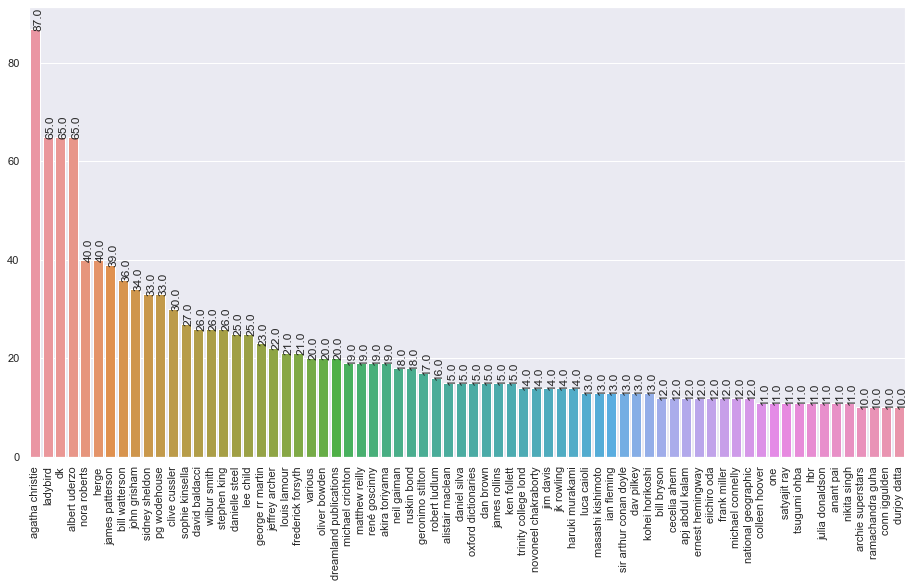

Category-author frequencies after removing the non-frequent: 


Rare_Author               6805
agatha christie             87
ladybird                    65
albert uderzo               65
dk                          65
nora roberts                40
herge                       40
james patterson             39
bill watterson              36
john grisham                34
sidney sheldon              33
pg wodehouse                33
clive cussler               30
sophie kinsella             27
wilbur smith                26
stephen king                26
david baldacci              26
lee child                   25
danielle steel              25
george rr martin            23
jeffrey archer              22
louis lamour                21
frederick forsyth           21
oliver bowden               20
dreamland publications      20
various                     20
rené goscinny               19
matthew reilly              19
michael crichton            19
akira toriyama              19
ruskin bond                 18
neil gaiman                 18
geronimo

In [6]:
# Taking a series of lists for the different authors, 
# since there are books which have multiple authors
authors_series = pd.Series([author.split(", ") for author in data_df['Authors']])# Encoding with MultiLabelBinarizer, since one-hot only takes one value, but 
# in our case we have multiple authors for a book
df_authors_one_hot = multi_label_binarize_feature(authors_series)
# Showing results
display(df_authors_one_hot)

# Showing the frequency of categories before removing non-important
df_values = df_authors_one_hot.astype(bool).sum(axis=0).sort_values(ascending=False)
print("Category-author frequencies: ")
display(df_values)

# Dropping the rare authors, and marking them as rare
df_authors_one_hot = handle_features(df_authors_one_hot, other_label="Rare_Author")

# Dropping the column which shows that the book has no author since it will be the base (all zero representation)
# Basically, n-1 of the n categories are used, similarly to the dummy encoding
#df_authors_one_hot = df_authors_one_hot.drop(['NA_kind'], axis=1)

# Showing the frequency of categories after removing non-important
df_values = df_authors_one_hot.astype(bool).sum(axis=0).sort_values(ascending=False)
print("Category-author frequencies after removing the non-frequent: ")
display(df_values)

In [24]:
# authors_dict = {}

# for author in df_authors.columns:
#     authors_dict[author] = []


# for i, book in enumerate(df_authors.iterrows()):
#     for author in df_authors.columns:
#         if df_authors.loc[i, author] > 0:
#             authors_dict[author].append(data_df['Price'][i])

# for author, prices in authors_dict.items():
#     print(author, '->', prices)

### Categories variables (one-hot encoding)

In [7]:
from sklearn.preprocessing import OneHotEncoder

def apply_one_hot(df):
    encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
    _enoded_data = encoder.fit_transform(df).toarray()
    df_one_hot_feature = pd.DataFrame(data=_enoded_data, 
                                      columns=encoder.get_feature_names_out(df.columns))
    return df_one_hot_feature

#### One-hot encoding Genre

Category-genre frequencies: 


Genre_Action & Adventure (Books)               1183
Genre_Romance (Books)                           517
Genre_Biographies & Autobiographies (Books)     463
Genre_Crime, Thriller & Mystery (Books)         335
Genre_Contemporary Fiction (Books)              325
                                               ... 
Genre_Religious Studies                           1
Genre_FPC                                         1
Genre_Flash Cards                                 1
Genre_Forensic Medicine                           1
Genre_Zoology                                     1
Length: 362, dtype: int64

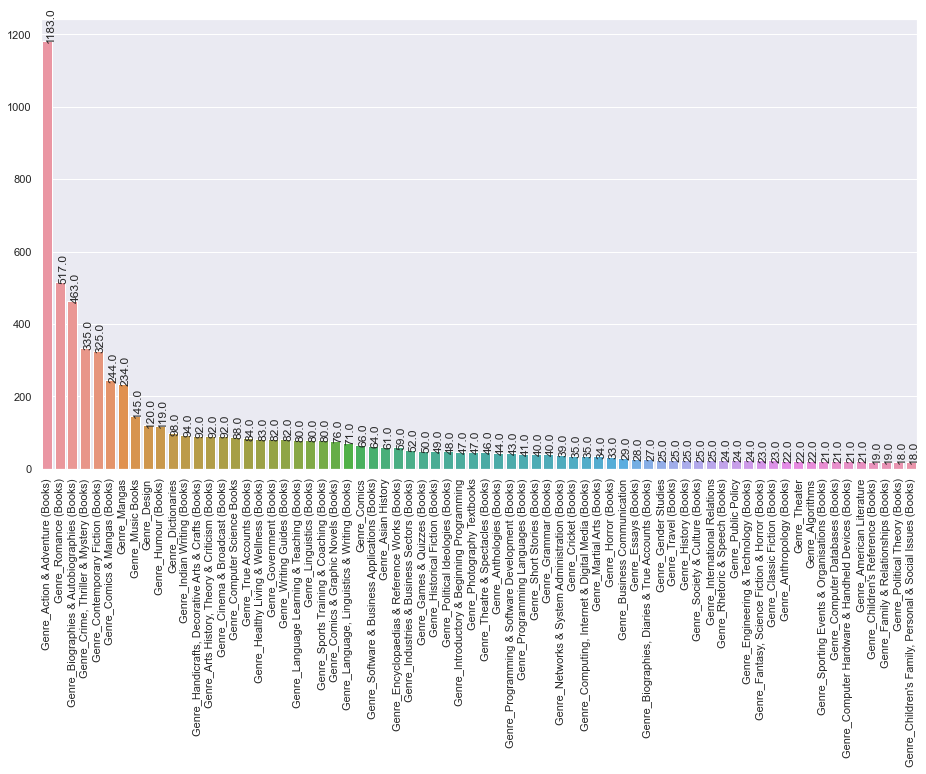

Category-genre frequencies after removing the non-frequent: 


Genre_Action & Adventure (Books)                                  1183
Genre_Romance (Books)                                              517
Genre_Biographies & Autobiographies (Books)                        463
Genre_Crime, Thriller & Mystery (Books)                            335
Genre_Contemporary Fiction (Books)                                 325
                                                                  ... 
Genre_Political Structure & Processes (Books)                       17
Genre_Journalism Books                                              16
Genre_Architecture (Books)                                          16
Genre_Children's Crafts, Hobbies & Practical Interests (Books)      16
Genre_Economics Textbooks                                           16
Length: 76, dtype: int64

In [8]:
df_genre_one_hot = apply_one_hot(data_df[['Genre']])

# Showing the frequency of categories before removing non-important
df_values = df_genre_one_hot.astype(bool).sum(axis=0).sort_values(ascending=False)
print("Category-genre frequencies: ")
display(df_values)

# Dropping the rare genres, and marking them as rare
df_genre_one_hot = handle_features(df_genre_one_hot, keep_rare=False, other_label="Rare_Genre")

# Dropping the column which shows that the book has no genre since it will be the base (all zero representation)
# Basically, n-1 of the n categories are used, similarly to the dummy encoding
#df_genre_one_hot = df_genre_one_hot.drop(['NA_kind'], axis=1)

# Showing the frequency of categories after removing non-important
df_values = df_genre_one_hot.astype(bool).sum(axis=0).sort_values(ascending=False)
print("Category-genre frequencies after removing the non-frequent: ")
display(df_values)

#### One-hot encoding Book category 

Category-BookCategory frequencies: 


BookCategory_Crime, Thriller & Mystery               878
BookCategory_Comics & Mangas                         744
BookCategory_Language, Linguistics & Writing         733
BookCategory_Biographies, Diaries & True Accounts    732
BookCategory_Romance                                 702
BookCategory_Humour                                  670
BookCategory_Computing, Internet & Digital Media     648
BookCategory_Arts, Film & Photography                638
BookCategory_Sports                                  614
BookCategory_Politics                                402
dtype: int64

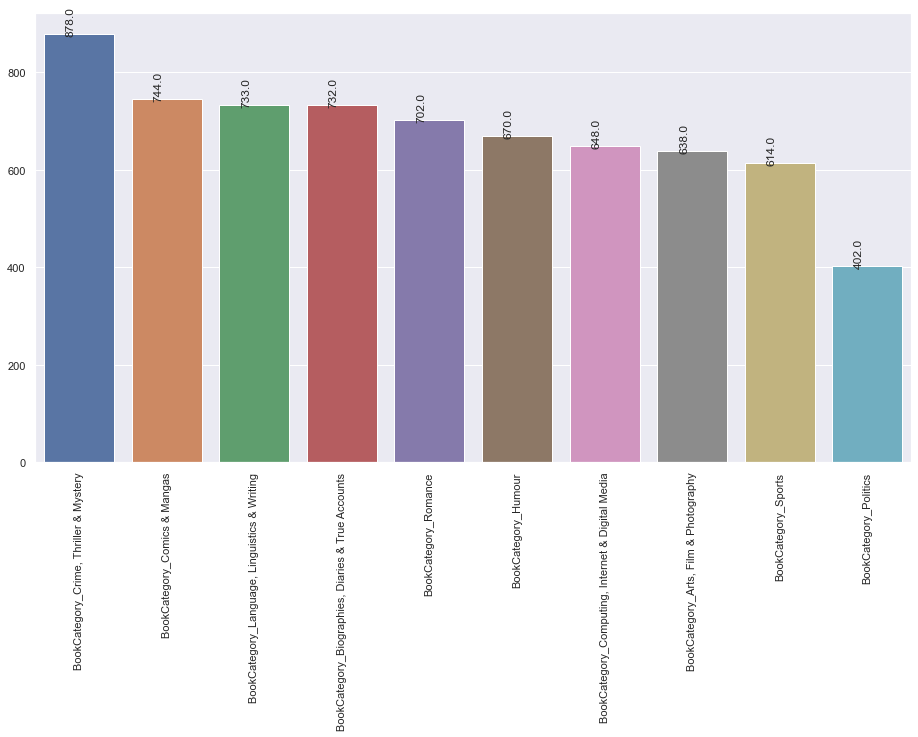

Category-BookCategory frequencies after removing the non-frequent: 


BookCategory_Crime, Thriller & Mystery               878
BookCategory_Comics & Mangas                         744
BookCategory_Language, Linguistics & Writing         733
BookCategory_Biographies, Diaries & True Accounts    732
BookCategory_Romance                                 702
BookCategory_Humour                                  670
BookCategory_Computing, Internet & Digital Media     648
BookCategory_Arts, Film & Photography                638
BookCategory_Sports                                  614
BookCategory_Politics                                402
dtype: int64

In [9]:
df_BookCategory_one_hot = apply_one_hot(data_df[['BookCategory']])

# Showing the frequency of categories before removing non-important
df_values = df_BookCategory_one_hot.astype(bool).sum(axis=0).sort_values(ascending=False)
print("Category-BookCategory frequencies: ")
display(df_values)

# Dropping the rare BookCategorys, and marking them as rare
df_BookCategory_one_hot = handle_features(df_BookCategory_one_hot, keep_rare=False, other_label="Rare_Genre")

# Dropping the column which shows that the book has no BookCategory since it will be the base (all zero representation)
# Basically, n-1 of the n categories are used, similarly to the dummy encoding
#df_BookCategory_one_hot = df_BookCategory_one_hot.drop(['NA_kind'], axis=1)

# Showing the frequency of categories after removing non-important
df_values = df_BookCategory_one_hot.astype(bool).sum(axis=0).sort_values(ascending=False)
print("Category-BookCategory frequencies after removing the non-frequent: ")
display(df_values)

#### One-hot encoding Print

Category-Print frequencies: 


Print_Paperback                6463
Print_Hardcover                1056
Print_Mass Market Paperback     200
Print_Sheet music                32
Print_Flexibound                 19
Print_Cards                       9
Print_Spiral-bound                6
Print_Tankobon Softcover          3
Print_Loose Leaf                  3
Print_Product Bundle              1
Print_Plastic Comb                1
Print_Perfect Paperback           1
Print_Library Binding             1
Print_Leather Bound               1
dtype: int64

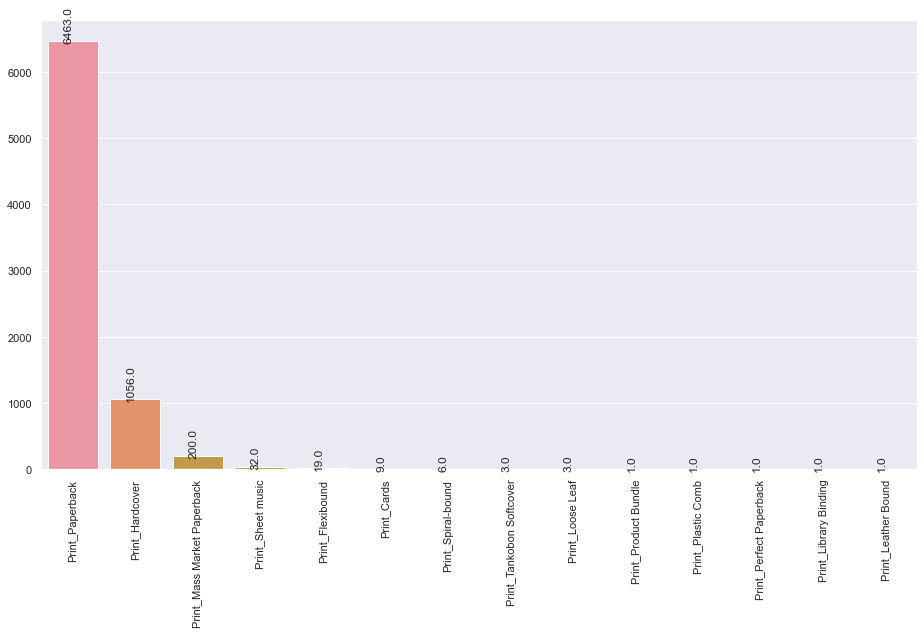

Category-Print frequencies after removing the non-frequent: 


Print_Paperback                6463
Print_Hardcover                1056
Print_Mass Market Paperback     200
Print_Sheet music                32
Print_Flexibound                 19
dtype: int64

In [10]:
df_Print_one_hot = apply_one_hot(data_df[['Print']])

# Showing the frequency of categories before removing non-important
df_values = df_Print_one_hot.astype(bool).sum(axis=0).sort_values(ascending=False)
print("Category-Print frequencies: ")
display(df_values)

# Dropping the rare Prints, and marking them as rare
df_Print_one_hot = handle_features(df_Print_one_hot, keep_rare=False, other_label="Rare_Genre")

# Dropping the column which shows that the book has no Print since it will be the base (all zero representation)
# Basically, n-1 of the n categories are used, similarly to the dummy encoding
#df_Print_one_hot = df_Print_one_hot.drop(['NA_kind'], axis=1)

# Showing the frequency of categories after removing non-important
df_values = df_Print_one_hot.astype(bool).sum(axis=0).sort_values(ascending=False)
print("Category-Print frequencies after removing the non-frequent: ")
display(df_values)

## Adding the different new columns

In this phase, the original categorical variables are removed, and the new "one-hotted" columns are added to the dataframe

In [11]:
final_data_df =  data_df.drop(['Genre', 'BookCategory', 'Authors', 'Print', 'Type'], axis=1)

In [12]:
final_data_df

,Reviews,Ratings,Price,Set,No. Authors,Year,Topic 0,Topic 1,Topic 2,Topic 3,...,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Cos_Month,Sin_Month
0,4.0,8,220.00,train,1,2016.0,0.005400,0.005400,0.005400,0.005400,...,0.005400,0.738624,0.005400,0.005400,0.005400,0.005400,0.005400,0.005400,-4.371139e-08,1.000000
1,3.9,14,202.93,train,1,2012.0,0.005176,0.005176,0.005176,0.005176,...,0.005176,0.005176,0.005176,0.049165,0.213398,0.005176,0.132964,0.005176,8.660256e-01,-0.500000
2,4.8,6,299.00,train,1,1982.0,0.003774,0.003774,0.003774,0.003774,...,0.003774,0.003774,0.003774,0.003774,0.003774,0.003774,0.003774,0.003774,5.000000e-01,0.866025
3,4.1,13,180.00,train,1,2017.0,0.006728,0.006728,0.006728,0.006728,...,0.006728,0.275166,0.006728,0.006728,0.006728,0.006728,0.006728,0.006728,5.000003e-01,-0.866025
4,5.0,1,965.62,train,1,2006.0,0.005478,0.005478,0.005478,0.005478,...,0.005478,0.172269,0.005478,0.005478,0.125926,0.005478,0.005478,0.005478,5.000003e-01,-0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7792,5.0,4,NaN,test,1,2011.0,0.004117,0.004117,0.004117,0.004117,...,0.004117,0.004117,0.004117,0.016568,0.353720,0.004117,0.004117,0.004117,-5.000001e-01,0.866025
7793,3.6,13,NaN,test,1,2013.0,0.006221,0.006221,0.006221,0.006221,...,0.006221,0.021726,0.006221,0.006221,0.661110,0.006221,0.006221,0.006221,-8.660255e-01,0.500000
7794,4.0,5,NaN,test,1,2011.0,0.006711,0.006711,0.006711,0.006711,...,0.006711,0.006711,0.006711,0.006711,0.075942,0.006711,0.006711,0.006711,1.192488e-08,-1.000000
7795,3.5,3,NaN,test,1,2009.0,0.004643,0.004643,0.004643,0.004643,...,0.004643,0.177982,0.004643,0.109115,0.004643,0.004643,0.004643,0.113300,1.192488e-08,-1.000000


In [13]:
final_data_df = pd.concat([final_data_df, 
                           df_kind_one_hot, df_authors_one_hot,
                           df_genre_one_hot, df_BookCategory_one_hot, df_Print_one_hot], axis=1)
final_data_df

,Reviews,Ratings,Price,Set,No. Authors,Year,Topic 0,Topic 1,Topic 2,Topic 3,...,BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Print_Flexibound,Print_Hardcover,Print_Mass Market Paperback,Print_Paperback,Print_Sheet music
0,4.0,8,220.00,train,1,2016.0,0.005400,0.005400,0.005400,0.005400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.9,14,202.93,train,1,2012.0,0.005176,0.005176,0.005176,0.005176,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.8,6,299.00,train,1,1982.0,0.003774,0.003774,0.003774,0.003774,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.1,13,180.00,train,1,2017.0,0.006728,0.006728,0.006728,0.006728,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,1,965.62,train,1,2006.0,0.005478,0.005478,0.005478,0.005478,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7792,5.0,4,NaN,test,1,2011.0,0.004117,0.004117,0.004117,0.004117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7793,3.6,13,NaN,test,1,2013.0,0.006221,0.006221,0.006221,0.006221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7794,4.0,5,NaN,test,1,2011.0,0.006711,0.006711,0.006711,0.006711,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7795,3.5,3,NaN,test,1,2009.0,0.004643,0.004643,0.004643,0.004643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
final_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7797 entries, 0 to 7796
Columns: 167 entries, Reviews to Print_Sheet music
dtypes: float64(121), int64(45), object(1)
memory usage: 9.9+ MB


## Data partition and evaluation function-metric

Split to the original train and test and drop the 'set' attribute

In [22]:
# X_train = data_df[data_df['Set'] == 'train']
# y_train = X_train['Price']
# X_train =  X_train.drop(['Set', 'Price', 'No. Authors', 'Cos_Month', 'Sin_Month'], axis=1)

# X_test = data_df[data_df['Set'] == 'test']
# #y_test = X_test['Price']
# X_test =  X_test.drop(['Set', 'Price', 'No. Authors', 'Cos_Month', 'Sin_Month'], axis=1)

X_train = final_data_df[final_data_df['Set'] == 'train']
y_train = X_train['Price']
X_train =  X_train.drop(['Set', 'Price'], axis=1)

X_test = final_data_df[final_data_df['Set'] == 'test']
#y_test = X_test['Price']
X_test =  X_test.drop(['Set', 'Price'], axis=1)

In [23]:
X_train

,Reviews,Ratings,No. Authors,Year,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,...,BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Print_Flexibound,Print_Hardcover,Print_Mass Market Paperback,Print_Paperback,Print_Sheet music
0,4.0,8,1,2016.0,0.005400,0.005400,0.005400,0.005400,0.005400,0.005400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.9,14,1,2012.0,0.005176,0.005176,0.005176,0.005176,0.005176,0.005176,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.8,6,1,1982.0,0.003774,0.003774,0.003774,0.003774,0.003774,0.003774,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.1,13,1,2017.0,0.006728,0.006728,0.006728,0.006728,0.141477,0.006728,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,1,1,2006.0,0.005478,0.005478,0.005478,0.005478,0.005478,0.005478,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,5.0,2,1,2018.0,0.003967,0.003967,0.003967,0.003967,0.016727,0.003967,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6233,3.3,9,1,2016.0,0.003941,0.003941,0.003941,0.003941,0.003941,0.003941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6234,3.8,3,1,2006.0,0.004137,0.004137,0.004137,0.004137,0.004137,0.004137,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6235,3.5,4,1,2015.0,0.004544,0.004544,0.004544,0.004544,0.004544,0.004544,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Evaluation metric

Implement evaluation function same as the one from Machine Hack for this task.

Specifically, the evaluation metric used is the Negative Root Mean Squared Logarithmic Error (NRMSLE):

$$ \text { NRMSLE }= 1 - \sqrt{\frac{1}{N} \sum_{i=1}^{N}\left(\log \left(y_{i}+1\right)-\log \left(\hat{y}_{i}+1\right)\right)^{2}} $$

Where:

- $N$  is the total number of observations in the dataset

- $\hat{y_i}$ is the prediction of $i_{th}$ target

- $y_i$ is the actual target for i

- log(.) gives the natural logarithm of the input

NRMSLE adds one to both actual and predicted values before taking the natural logarithm, to avoid taking the natural log of possible zero values. As a result, the metric can be used if actual or predicted have zero-valued elements. https://hrngok.github.io/posts/metrics/

The metric is not appropriate if either is negative valued, but in our case since the target variable is the price, it cannot be negative.

Futhermore, the metric-function is ideal when we don’t want to penalize big differences when both the predicted and the actual are big numbers, and in cases where we want to penalize under-estimates more than over-estimates.
(Kirubakumaresh (KK) Rajendran, Data Science Consultant)

It was found that often in businesses, penalizing the under-estimate more than over-estimate is important for prediction of sales and inventory demands. To some extent having extra inventory or supply might be more preferable to not being able to providing product as much as the demand.

### Prediction-Modelling

In [ ]:
import multiprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [18]:
from sklearn.metrics import make_scorer 

# https://hrngok.github.io/posts/metrics/
def nrmsle(y_true, y_pred): 
    return 1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())

#loss  = make_scorer(nrmsle, greater_is_better=False)
score = make_scorer(nrmsle, greater_is_better=True)

#### Random Forest Regressor

In general Random Forests take a lot of time to train for many trees (number of estimators). 

Apart from the below grid-search settings, more settings were used before. The below hyperparameter tuning procedure, took several hours.

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Fine tune most important hyper-parameters 
# https://blog.dataiku.com/narrowing-the-search-which-hyperparameters-really-matter
# https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6
# https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/
parameters = {'max_depth':[30, 40, 45, 50], 'n_estimators':[500, 600, 800], 
              'min_samples_leaf':[1, 3], 'max_features':['auto', 'sqrt'], 'random_state':[random_state]}
model = RandomForestRegressor()


# Grid-search k-fold cross validation using the custom made score
clf = GridSearchCV(model, parameters, cv=10, verbose=8, scoring=score,
                   n_jobs=multiprocessing.cpu_count() - 1, return_train_score=True)
clf.fit(X_train, y_train)


print("The best RMSLE of all model parameters' combination on model: {:.4f}".format(clf.best_score_))
display(pd.DataFrame(clf.cv_results_).sort_values(by=['rank_test_score'])[['mean_fit_time', 'mean_score_time', 
                                           'params', 'mean_train_score', 'mean_test_score', 'rank_test_score']])

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV 1/10] END max_depth=30, max_features=auto, min_samples_leaf=1, n_estimators=500, random_state=420;, score=(train=0.861, test=0.729) total time= 2.6min
[CV 1/10] END max_depth=30, max_features=auto, min_samples_leaf=1, n_estimators=600, random_state=420;, score=(train=0.861, test=0.729) total time= 3.2min
[CV 9/10] END max_depth=30, max_features=auto, min_samples_leaf=1, n_estimators=600, random_state=420;, score=(train=0.861, test=0.727) total time= 3.2min
[CV 7/10] END max_depth=30, max_features=auto, min_samples_leaf=1, n_estimators=800, random_state=420;, score=(train=0.861, test=0.729) total time= 4.2min
[CV 4/10] END max_depth=30, max_features=auto, min_samples_leaf=3, n_estimators=500, random_state=420;, score=(train=0.827, test=0.711) total time= 1.9min
[CV 8/10] END max_depth=30, max_features=auto, min_samples_leaf=3, n_estimators=500, random_state=420;, score=(train=0.827, test=0.707) total time= 1.9min
[CV 5/1

[CV 7/10] END max_depth=30, max_features=auto, min_samples_leaf=1, n_estimators=500, random_state=420;, score=(train=0.861, test=0.729) total time= 2.6min
[CV 4/10] END max_depth=30, max_features=auto, min_samples_leaf=1, n_estimators=600, random_state=420;, score=(train=0.862, test=0.712) total time= 3.1min
[CV 8/10] END max_depth=30, max_features=auto, min_samples_leaf=1, n_estimators=600, random_state=420;, score=(train=0.861, test=0.711) total time= 3.1min
[CV 5/10] END max_depth=30, max_features=auto, min_samples_leaf=1, n_estimators=800, random_state=420;, score=(train=0.863, test=0.716) total time= 4.1min
[CV 2/10] END max_depth=30, max_features=auto, min_samples_leaf=3, n_estimators=500, random_state=420;, score=(train=0.826, test=0.727) total time= 1.9min
[CV 7/10] END max_depth=30, max_features=auto, min_samples_leaf=3, n_estimators=500, random_state=420;, score=(train=0.827, test=0.727) total time= 2.0min
[CV 6/10] END max_depth=30, max_features=auto, min_samples_leaf=3, n_e

[CV 4/10] END max_depth=30, max_features=auto, min_samples_leaf=1, n_estimators=500, random_state=420;, score=(train=0.862, test=0.711) total time= 2.5min
[CV 8/10] END max_depth=30, max_features=auto, min_samples_leaf=1, n_estimators=500, random_state=420;, score=(train=0.860, test=0.711) total time= 2.6min
[CV 6/10] END max_depth=30, max_features=auto, min_samples_leaf=1, n_estimators=600, random_state=420;, score=(train=0.858, test=0.749) total time= 3.1min
[CV 3/10] END max_depth=30, max_features=auto, min_samples_leaf=1, n_estimators=800, random_state=420;, score=(train=0.861, test=0.724) total time= 4.1min
[CV 9/10] END max_depth=30, max_features=auto, min_samples_leaf=1, n_estimators=800, random_state=420;, score=(train=0.861, test=0.727) total time= 3.8min
[CV 3/10] END max_depth=30, max_features=auto, min_samples_leaf=3, n_estimators=600, random_state=420;, score=(train=0.826, test=0.719) total time= 2.3min
[CV 9/10] END max_depth=30, max_features=auto, min_samples_leaf=3, n_e

[CV 2/10] END max_depth=30, max_features=auto, min_samples_leaf=1, n_estimators=500, random_state=420;, score=(train=0.861, test=0.726) total time= 2.6min
[CV 3/10] END max_depth=30, max_features=auto, min_samples_leaf=1, n_estimators=600, random_state=420;, score=(train=0.861, test=0.724) total time= 3.2min
[CV 10/10] END max_depth=30, max_features=auto, min_samples_leaf=1, n_estimators=600, random_state=420;, score=(train=0.864, test=0.710) total time= 3.1min
[CV 6/10] END max_depth=30, max_features=auto, min_samples_leaf=1, n_estimators=800, random_state=420;, score=(train=0.858, test=0.749) total time= 4.1min
[CV 3/10] END max_depth=30, max_features=auto, min_samples_leaf=3, n_estimators=500, random_state=420;, score=(train=0.826, test=0.720) total time= 2.0min
[CV 9/10] END max_depth=30, max_features=auto, min_samples_leaf=3, n_estimators=500, random_state=420;, score=(train=0.826, test=0.720) total time= 1.8min
[CV 4/10] END max_depth=30, max_features=auto, min_samples_leaf=3, n_

,mean_fit_time,mean_score_time,params,mean_train_score,mean_test_score,rank_test_score
26,222.251403,0.245528,"{'max_depth': 45, 'max_features': 'auto', 'min...",0.869071,0.723654,1
38,220.751941,0.234548,"{'max_depth': 50, 'max_features': 'auto', 'min...",0.869221,0.723637,2
14,229.563277,0.233338,"{'max_depth': 40, 'max_features': 'auto', 'min...",0.868716,0.723612,3
25,167.517272,0.189194,"{'max_depth': 45, 'max_features': 'auto', 'min...",0.868981,0.723548,4
37,167.629846,0.184316,"{'max_depth': 50, 'max_features': 'auto', 'min...",0.869156,0.723497,5
13,229.281886,0.238014,"{'max_depth': 40, 'max_features': 'auto', 'min...",0.868655,0.723430,6
24,139.181441,0.154456,"{'max_depth': 45, 'max_features': 'auto', 'min...",0.868949,0.723339,7
36,139.362120,0.153834,"{'max_depth': 50, 'max_features': 'auto', 'min...",0.869132,0.723255,8
12,178.675602,0.209875,"{'max_depth': 40, 'max_features': 'auto', 'min...",0.868609,0.723238,9
2,241.332704,0.245950,"{'max_depth': 30, 'max_features': 'auto', 'min...",0.861359,0.723213,10


[CV 10/10] END max_depth=50, max_features=auto, min_samples_leaf=3, n_estimators=800, random_state=420;, score=(train=0.830, test=0.708) total time= 4.4min
[CV 7/10] END max_depth=50, max_features=sqrt, min_samples_leaf=1, n_estimators=800, random_state=420;, score=(train=0.865, test=0.719) total time=  38.4s
[CV 4/10] END max_depth=50, max_features=sqrt, min_samples_leaf=3, n_estimators=500, random_state=420;, score=(train=0.784, test=0.705) total time=  19.2s
[CV 10/10] END max_depth=50, max_features=sqrt, min_samples_leaf=3, n_estimators=500, random_state=420;, score=(train=0.785, test=0.703) total time=  16.9s
[CV 7/10] END max_depth=50, max_features=sqrt, min_samples_leaf=3, n_estimators=600, random_state=420;, score=(train=0.783, test=0.710) total time=  21.4s
[CV 4/10] END max_depth=50, max_features=sqrt, min_samples_leaf=3, n_estimators=800, random_state=420;, score=(train=0.784, test=0.705) total time=  26.7s
[CV 8/10] END max_depth=45, max_features=sqrt, min_samples_leaf=3, n

[CV 9/10] END max_depth=50, max_features=auto, min_samples_leaf=1, n_estimators=500, random_state=420;, score=(train=0.868, test=0.727) total time= 1.8min
[CV 5/10] END max_depth=50, max_features=auto, min_samples_leaf=1, n_estimators=600, random_state=420;, score=(train=0.870, test=0.717) total time= 2.7min
[CV 2/10] END max_depth=50, max_features=auto, min_samples_leaf=1, n_estimators=800, random_state=420;, score=(train=0.869, test=0.727) total time= 4.0min
[CV 1/10] END max_depth=50, max_features=auto, min_samples_leaf=3, n_estimators=500, random_state=420;, score=(train=0.826, test=0.723) total time= 1.9min
[CV 5/10] END max_depth=50, max_features=auto, min_samples_leaf=3, n_estimators=500, random_state=420;, score=(train=0.829, test=0.713) total time= 1.9min
[CV 2/10] END max_depth=50, max_features=auto, min_samples_leaf=3, n_estimators=600, random_state=420;, score=(train=0.827, test=0.727) total time= 2.3min
[CV 9/10] END max_depth=50, max_features=auto, min_samples_leaf=3, n_e

In [24]:
# Getting the optimal hyper-parameters of the model
best_params = clf.best_params_

Retraining the model with all the training data and with the best hyper-parameters

In [26]:
# fit all data to best model
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=45, n_estimators=800, random_state=420)

Make predictions on Test set

In [27]:
# Get predictions, calculate the predictions of the submissions
y_pred = best_model.predict(X_test)
# Saving-exporting the results to a .csv file
pd.DataFrame(y_pred, columns = ['Price']).to_csv('submission_RF_all_features.csv', index=False)
# 0.73111

#### Gradient Boosting Trees Regression

In [25]:
import multiprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Fine tune important hyper-parameters
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }
model = GradientBoostingRegressor(random_state=random_state)

# Grid-search k-fold cross validation using the custom made score
clf = GridSearchCV(model, parameters, cv=10, verbose=8, scoring=score,
                   n_jobs=multiprocessing.cpu_count() - 1, return_train_score=True)
clf.fit(X_train, y_train)


print("The best RMSLE of all model parameters' combination on model: {:.4f}".format(clf.best_score_))
display(pd.DataFrame(clf.cv_results_).sort_values(by=['rank_test_score'])[['mean_fit_time', 'mean_score_time', 
                                           'params', 'mean_train_score', 'mean_test_score', 'rank_test_score']])

Fitting 10 folds for each of 64 candidates, totalling 640 fits
The best RMSLE of all model parameters' combination on model: 0.7286


,mean_fit_time,mean_score_time,params,mean_train_score,mean_test_score,rank_test_score
30,331.704296,0.058147,"{'learning_rate': 0.02, 'max_depth': 10, 'n_es...",0.885202,0.728550,1
47,504.944795,0.076794,"{'learning_rate': 0.03, 'max_depth': 10, 'n_es...",0.942676,0.728285,2
31,501.739761,0.076496,"{'learning_rate': 0.02, 'max_depth': 10, 'n_es...",0.913146,0.728265,3
61,157.829463,0.029308,"{'learning_rate': 0.04, 'max_depth': 10, 'n_es...",0.884971,0.728224,4
46,331.949309,0.052161,"{'learning_rate': 0.03, 'max_depth': 10, 'n_es...",0.913523,0.727776,5
...,...,...,...,...,...,...
12,31.626281,0.016754,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",0.729942,0.692729,60
16,13.587486,0.011769,"{'learning_rate': 0.02, 'max_depth': 4, 'n_est...",0.700156,0.689937,61
8,82.988696,0.011207,"{'learning_rate': 0.01, 'max_depth': 8, 'n_est...",0.714300,0.687795,62
4,17.349335,0.010801,"{'learning_rate': 0.01, 'max_depth': 6, 'n_est...",0.697843,0.682668,63


In [26]:
# Getting the optimal hyper-parameters of the model
best_params = clf.best_params_

In [27]:
# fit all data to best model
best_model = GradientBoostingRegressor(**best_params)
best_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.02, max_depth=10, n_estimators=1000)

In [29]:
# Get predictions, calculate the predictions of the submissions
y_pred = best_model.predict(X_test)
# Saving-exporting the results to a .csv file
pd.DataFrame(y_pred, columns = ['Price']).to_csv('submission_GB_all_features.csv', index=False)
# 0.7313

#### Support Vector Regression (RBF Kernel)

Support Vector Machine algorithms are not scale invariant, so it is highly recommended to scale the data https://scikit-learn.org/stable/modules/svm.html

Using Standard Scaler by using only the sample mean of the Training data

In [16]:
from sklearn.preprocessing import StandardScaler

# Define standard scaler for features X
X_scaler = StandardScaler()
# fit-transform data
X_train_scaled = X_scaler.fit_transform(X_train)
# transform data
X_test_scaled = X_scaler.transform(X_test)

# Define standard scaler for target y
y_scaler = StandardScaler()
# fit-transform train data
y_train_scaled = y_scaler.fit_transform(np.array(y_train).reshape(-1,1))

Varifying that current mean of scaled data is zero

In [18]:
print(X_train_scaled.mean())
print(X_test_scaled.mean())
print(y_train_scaled.mean())

4.6908987389567835e-17
0.003250666143811924
7.177199351112124e-17


Modifying scoring function to inverse scale the predicted data

In [15]:
def nrmsle_scaled(y_true, y_pred, scaler=None): 
    if scaler is not  None:
      y_pred = scaler.inverse_transform(np.array(y_pred).reshape(-1,1))
      y_true = scaler.inverse_transform(np.array(y_true).reshape(-1,1))
      
    return 1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())

In [17]:
score = make_scorer(nrmsle_scaled, scaler=y_scaler, greater_is_better=True)

Using Support Vector Machine (SVM) Regression with Radial Basis Function (RBF) Kernel.

The value of $\gamma$ was kept constant with the default value. The default value of $\gamma$ is the the heuristic approach which uses the value of $s = \frac{1}{n_{features} \dot Var(X)}$. Even though the default $s$ value isnot the optimal, it usually performs well after the $C$ hyperparameter is tuned.

In SVMs, large values of $C$ allows the model to fit better (reduce bias) for hard prediction tasks, but if it is too large it will not generalize to well (overfitting due to high variance).

For this task hyperparemeter tuning with GridSearch and CrossValidation was followed in order to find an appropriate value of $C$


Initially it was searched among $C$=[0.01, 0.1, 1, 10, 100]

In [19]:
import multiprocessing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ['rbf'], 'gamma': ['scale'], 'C':[0.01, 0.1, 1, 10, 100]}
model = SVR()

clf = GridSearchCV(model, parameters, cv=10, verbose=8, scoring=score,
                   n_jobs=- 1, return_train_score=True)
clf.fit(X_train,np.array(y_train).reshape(-1,1))


print("The best RMSLE of all model parameters' combination on model: {:.4f}".format(clf.best_score_))
display(pd.DataFrame(clf.cv_results_).sort_values(by=['rank_test_score'])[['mean_fit_time', 'mean_score_time', 
                                           'params', 'mean_train_score', 'mean_test_score', 'rank_test_score']])

Fitting 10 folds for each of 5 candidates, totalling 50 fits


/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The best RMSLE of all model parameters' combination on model: 0.6727


,mean_fit_time,mean_score_time,params,mean_train_score,mean_test_score,rank_test_score
4,23.288307,3.049182,"{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}",0.672713,0.672683,1
3,28.276470,3.970940,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.670523,0.670635,2
2,28.203171,3.566583,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.667712,0.667866,3
1,31.503188,4.105176,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.667033,0.667190,4
0,33.529318,4.550905,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}",0.666961,0.667119,5


[CV 1/10] END C=0.01, gamma=scale, kernel=rbf;, score=(train=0.667, test=0.670) total time=  35.5s
[CV 2/10] END C=0.1, gamma=scale, kernel=rbf;, score=(train=0.665, test=0.683) total time=  38.4s
[CV 1/10] END C=1, gamma=scale, kernel=rbf;, score=(train=0.667, test=0.671) total time=  35.0s
[CV 9/10] END C=1, gamma=scale, kernel=rbf;, score=(train=0.667, test=0.677) total time=  28.3s
[CV 5/10] END C=10, gamma=scale, kernel=rbf;, score=(train=0.671, test=0.664) total time=  34.3s
[CV 5/10] END C=100, gamma=scale, kernel=rbf;, score=(train=0.674, test=0.664) total time=  29.8s


/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataC

[CV 8/10] END C=0.01, gamma=scale, kernel=rbf;, score=(train=0.668, test=0.659) total time=  37.7s
[CV 3/10] END C=0.1, gamma=scale, kernel=rbf;, score=(train=0.667, test=0.672) total time=  34.5s
[CV 10/10] END C=0.1, gamma=scale, kernel=rbf;, score=(train=0.669, test=0.646) total time=  34.0s
[CV 8/10] END C=1, gamma=scale, kernel=rbf;, score=(train=0.669, test=0.659) total time=  30.2s
[CV 7/10] END C=10, gamma=scale, kernel=rbf;, score=(train=0.672, test=0.658) total time=  32.9s
[CV 2/10] END C=100, gamma=scale, kernel=rbf;, score=(train=0.671, test=0.689) total time=  31.1s
[CV 3/10] END C=0.01, gamma=scale, kernel=rbf;, score=(train=0.666, test=0.672) total time=  37.0s
[CV 1/10] END C=0.1, gamma=scale, kernel=rbf;, score=(train=0.667, test=0.670) total time=  35.6s
[CV 8/10] END C=0.1, gamma=scale, kernel=rbf;, score=(train=0.668, test=0.659) total time=  37.6s
[CV 6/10] END C=1, gamma=scale, kernel=rbf;, score=(train=0.667, test=0.676) total time=  30.4s
[CV 4/10] END C=10, ga

/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataC

[CV 6/10] END C=0.01, gamma=scale, kernel=rbf;, score=(train=0.666, test=0.676) total time=  40.1s
[CV 4/10] END C=0.1, gamma=scale, kernel=rbf;, score=(train=0.666, test=0.673) total time=  37.1s
[CV 2/10] END C=1, gamma=scale, kernel=rbf;, score=(train=0.666, test=0.683) total time=  35.4s
[CV 10/10] END C=1, gamma=scale, kernel=rbf;, score=(train=0.670, test=0.647) total time=  29.2s
[CV 8/10] END C=10, gamma=scale, kernel=rbf;, score=(train=0.671, test=0.662) total time=  30.3s
[CV 6/10] END C=100, gamma=scale, kernel=rbf;, score=(train=0.672, test=0.681) total time=  29.3s


/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataC

[CV 5/10] END C=0.01, gamma=scale, kernel=rbf;, score=(train=0.668, test=0.661) total time=  41.0s
[CV 6/10] END C=0.1, gamma=scale, kernel=rbf;, score=(train=0.666, test=0.676) total time=  34.2s
[CV 4/10] END C=1, gamma=scale, kernel=rbf;, score=(train=0.667, test=0.674) total time=  32.7s
[CV 1/10] END C=10, gamma=scale, kernel=rbf;, score=(train=0.670, test=0.675) total time=  28.8s
[CV 9/10] END C=10, gamma=scale, kernel=rbf;, score=(train=0.670, test=0.677) total time=  33.4s
[CV 7/10] END C=100, gamma=scale, kernel=rbf;, score=(train=0.674, test=0.662) total time=  26.9s
[CV 4/10] END C=0.01, gamma=scale, kernel=rbf;, score=(train=0.666, test=0.673) total time=  41.7s
[CV 5/10] END C=0.1, gamma=scale, kernel=rbf;, score=(train=0.668, test=0.661) total time=  35.3s
[CV 3/10] END C=1, gamma=scale, kernel=rbf;, score=(train=0.667, test=0.673) total time=  35.6s
[CV 2/10] END C=10, gamma=scale, kernel=rbf;, score=(train=0.669, test=0.687) total time=  28.4s
[CV 10/10] END C=10, gamm

/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataC

[CV 7/10] END C=0.01, gamma=scale, kernel=rbf;, score=(train=0.668, test=0.655) total time=  39.0s
[CV 9/10] END C=0.01, gamma=scale, kernel=rbf;, score=(train=0.666, test=0.676) total time=  35.8s
[CV 9/10] END C=0.1, gamma=scale, kernel=rbf;, score=(train=0.666, test=0.676) total time=  32.1s
[CV 5/10] END C=1, gamma=scale, kernel=rbf;, score=(train=0.668, test=0.662) total time=  29.4s
[CV 3/10] END C=10, gamma=scale, kernel=rbf;, score=(train=0.670, test=0.676) total time=  32.7s
[CV 1/10] END C=100, gamma=scale, kernel=rbf;, score=(train=0.672, test=0.678) total time=  29.7s
[CV 9/10] END C=100, gamma=scale, kernel=rbf;, score=(train=0.672, test=0.677) total time=  16.2s


/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataC

[CV 2/10] END C=0.01, gamma=scale, kernel=rbf;, score=(train=0.665, test=0.683) total time=  39.0s
[CV 10/10] END C=0.01, gamma=scale, kernel=rbf;, score=(train=0.669, test=0.646) total time=  34.0s
[CV 7/10] END C=0.1, gamma=scale, kernel=rbf;, score=(train=0.668, test=0.655) total time=  37.3s
[CV 7/10] END C=1, gamma=scale, kernel=rbf;, score=(train=0.669, test=0.656) total time=  31.5s
[CV 6/10] END C=10, gamma=scale, kernel=rbf;, score=(train=0.669, test=0.679) total time=  35.1s
[CV 4/10] END C=100, gamma=scale, kernel=rbf;, score=(train=0.672, test=0.677) total time=  29.2s
[CV 10/10] END C=100, gamma=scale, kernel=rbf;, score=(train=0.675, test=0.656) total time=  14.5s


Larger $C$ value works better for the valition portions. 

Thus, more tuning with higher $C$ values was performed until an appropriate $C$ value was found.

Using SVR Model with for $C$ = [$100, 10^2, 10^5, 10^7$]

In [29]:
parameters = {'kernel': ['rbf'], 'gamma': ['scale'], 'C':[100, 10**2, 10**5, 10**7]}
model = SVR()

clf = GridSearchCV(model, parameters, cv=10, verbose=8, scoring=score,
                   n_jobs=- 1, return_train_score=True)
clf.fit(X_train,np.array(y_train).reshape(-1,1))


print("The best RMSLE of all model parameters' combination on model: {:.4f}".format(clf.best_score_))
display(pd.DataFrame(clf.cv_results_).sort_values(by=['rank_test_score'])[['mean_fit_time', 'mean_score_time', 
                                           'params', 'mean_train_score', 'mean_test_score', 'rank_test_score']])

Fitting 10 folds for each of 4 candidates, totalling 40 fits


/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The best RMSLE of all model parameters' combination on model: 0.7211


,mean_fit_time,mean_score_time,params,mean_train_score,mean_test_score,rank_test_score
3,38.039631,2.525673,"{'C': 10000000, 'gamma': 'scale', 'kernel': 'r...",0.724285,0.721132,1
2,26.958110,3.120637,"{'C': 100000, 'gamma': 'scale', 'kernel': 'rbf'}",0.686618,0.686174,2
0,30.474544,3.318783,"{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}",0.672713,0.672683,3
1,29.771366,3.865446,"{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}",0.672713,0.672683,3


More hyperparameter tuning, using SVR Model with for $C$ = [$10^7, 1.25*10^7, 1.5*10^7, 1.75*10^7$]

In [33]:
parameters = {'kernel': ['rbf'], 'gamma': ['scale'], 'C':[10**6, 1.25*(10**7), 1.3*(10**7), 1.4*(10**7), 1.5*(10**7)]}
model = SVR()

clf = GridSearchCV(model, parameters, cv=10, verbose=8, scoring=score,
                   n_jobs=- 1, return_train_score=True)
clf.fit(X_train,np.array(y_train).reshape(-1,1))


print("The best RMSLE of all model parameters' combination on model: {:.4f}".format(clf.best_score_))
display(pd.DataFrame(clf.cv_results_).sort_values(by=['rank_test_score'])[['mean_fit_time', 'mean_score_time', 
                                           'params', 'mean_train_score', 'mean_test_score', 'rank_test_score']])

Fitting 10 folds for each of 5 candidates, totalling 50 fits


/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The best RMSLE of all model parameters' combination on model: 0.7221


,mean_fit_time,mean_score_time,params,mean_train_score,mean_test_score,rank_test_score
4,42.117003,1.724716,"{'C': 15000000.0, 'gamma': 'scale', 'kernel': ...",0.725648,0.722070,1
3,45.735201,2.216930,"{'C': 14000000.0, 'gamma': 'scale', 'kernel': ...",0.725589,0.722010,2
2,47.483049,2.271189,"{'C': 13000000.0, 'gamma': 'scale', 'kernel': ...",0.725555,0.721971,3
1,53.835065,2.784192,"{'C': 12500000.0, 'gamma': 'scale', 'kernel': ...",0.725384,0.721939,4
0,34.540957,3.038689,"{'C': 1000000, 'gamma': 'scale', 'kernel': 'rbf'}",0.707841,0.706032,5


Retraining the model with all the training data and with the best hyper-parameters

In [34]:
# Getting the optimal hyper-parameters of the model
best_params = clf.best_params_

In [35]:
# fit all data to best model
best_model = SVR(**best_params)
best_model.fit(X_train, y_train)

SVR(C=15000000.0)

/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataC

[CV 6/10] END C=1000000, gamma=scale, kernel=rbf;, score=(train=0.706, test=0.719) total time=  38.5s
[CV 3/10] END C=12500000.0, gamma=scale, kernel=rbf;, score=(train=0.725, test=0.727) total time=  46.2s
[CV 9/10] END C=12500000.0, gamma=scale, kernel=rbf;, score=(train=0.726, test=0.723) total time= 1.2min
[CV 9/10] END C=13000000.0, gamma=scale, kernel=rbf;, score=(train=0.726, test=0.723) total time=  46.0s
[CV 7/10] END C=14000000.0, gamma=scale, kernel=rbf;, score=(train=0.725, test=0.722) total time= 1.4min
[CV 5/10] END C=1000000, gamma=scale, kernel=rbf;, score=(train=0.709, test=0.699) total time=  36.9s
[CV 10/10] END C=1000000, gamma=scale, kernel=rbf;, score=(train=0.711, test=0.682) total time=  37.1s
[CV 8/10] END C=12500000.0, gamma=scale, kernel=rbf;, score=(train=0.726, test=0.716) total time=  58.5s
[CV 5/10] END C=13000000.0, gamma=scale, kernel=rbf;, score=(train=0.727, test=0.715) total time=  31.1s
[CV 3/10] END C=14000000.0, gamma=scale, kernel=rbf;, score=(tr

/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataC

[CV 1/10] END C=1000000, gamma=scale, kernel=rbf;, score=(train=0.707, test=0.712) total time=  39.1s
[CV 1/10] END C=12500000.0, gamma=scale, kernel=rbf;, score=(train=0.725, test=0.729) total time= 1.1min
[CV 4/10] END C=13000000.0, gamma=scale, kernel=rbf;, score=(train=0.725, test=0.717) total time=  53.1s
[CV 1/10] END C=14000000.0, gamma=scale, kernel=rbf;, score=(train=0.725, test=0.730) total time=  43.2s
[CV 8/10] END C=14000000.0, gamma=scale, kernel=rbf;, score=(train=0.726, test=0.716) total time=  53.3s
[CV 8/10] END C=15000000.0, gamma=scale, kernel=rbf;, score=(train=0.727, test=0.716) total time=  35.5s


/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataC

[CV 3/10] END C=1000000, gamma=scale, kernel=rbf;, score=(train=0.707, test=0.715) total time=  37.0s
[CV 5/10] END C=12500000.0, gamma=scale, kernel=rbf;, score=(train=0.727, test=0.715) total time=  47.5s
[CV 10/10] END C=12500000.0, gamma=scale, kernel=rbf;, score=(train=0.728, test=0.696) total time=  43.1s
[CV 7/10] END C=13000000.0, gamma=scale, kernel=rbf;, score=(train=0.725, test=0.722) total time=  58.0s
[CV 6/10] END C=14000000.0, gamma=scale, kernel=rbf;, score=(train=0.724, test=0.737) total time= 1.1min
[CV 7/10] END C=15000000.0, gamma=scale, kernel=rbf;, score=(train=0.726, test=0.722) total time=  45.7s


/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataC

[CV 2/10] END C=1000000, gamma=scale, kernel=rbf;, score=(train=0.706, test=0.721) total time=  38.5s
[CV 4/10] END C=12500000.0, gamma=scale, kernel=rbf;, score=(train=0.725, test=0.717) total time=  50.8s
[CV 1/10] END C=13000000.0, gamma=scale, kernel=rbf;, score=(train=0.725, test=0.729) total time= 1.2min
[CV 2/10] END C=14000000.0, gamma=scale, kernel=rbf;, score=(train=0.724, test=0.737) total time=  45.0s
[CV 10/10] END C=14000000.0, gamma=scale, kernel=rbf;, score=(train=0.729, test=0.696) total time=  31.1s
[CV 4/10] END C=15000000.0, gamma=scale, kernel=rbf;, score=(train=0.724, test=0.715) total time= 1.1min
[CV 4/10] END C=1000000, gamma=scale, kernel=rbf;, score=(train=0.708, test=0.699) total time=  36.1s
[CV 2/10] END C=12500000.0, gamma=scale, kernel=rbf;, score=(train=0.724, test=0.736) total time=  58.7s
[CV 3/10] END C=13000000.0, gamma=scale, kernel=rbf;, score=(train=0.725, test=0.727) total time=  47.0s
[CV 8/10] END C=13000000.0, gamma=scale, kernel=rbf;, score=

/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataC

[CV 8/10] END C=1000000, gamma=scale, kernel=rbf;, score=(train=0.709, test=0.698) total time=  37.3s
[CV 6/10] END C=12500000.0, gamma=scale, kernel=rbf;, score=(train=0.724, test=0.738) total time=  56.1s
[CV 2/10] END C=13000000.0, gamma=scale, kernel=rbf;, score=(train=0.724, test=0.737) total time= 1.0min
[CV 10/10] END C=13000000.0, gamma=scale, kernel=rbf;, score=(train=0.728, test=0.696) total time=  51.5s
[CV 1/10] END C=15000000.0, gamma=scale, kernel=rbf;, score=(train=0.725, test=0.730) total time=  40.4s
[CV 6/10] END C=15000000.0, gamma=scale, kernel=rbf;, score=(train=0.725, test=0.737) total time= 1.0min


Make predictions on Test set

In [42]:
# Get predictions, calculate the predictions of the submissions
y_pred = best_model.predict(X_test)
# Saving-exporting the results to a .csv file
pd.DataFrame(y_pred, columns = ['Price']).to_csv('submission_SVR_all_features.csv', index=False)
# 0.73119